In [59]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import shutil

([<matplotlib.patches.Wedge at 0x7fda7624ef10>,
 [Text(0.7630186061269241, 0.792339956523793, '.xlsx'),
  Text(-0.8205353439234286, 0.7326129601450283, '.zip'),
  Text(-0.8733893355811166, -0.6687234618982467, '.rar'),
  Text(-0.06906940291286537, -1.0978294118765723, '.mp3'),
  Text(0.3661016537814694, -1.037289534844767, '.jpg'),
  Text(0.5894096149122087, -0.9287606289292425, '.pdf'),
  Text(0.7630187637683777, -0.7923398047159922, '.docx'),
  Text(0.8899188012632436, -0.6465636296283541, '.exe'),
  Text(0.9639374377283202, -0.5299288783844119, '.gif'),
  Text(1.0122551070136556, -0.43051085738314787, '.mpp'),
  Text(1.0503510576369894, -0.32674555195267413, '.azw3'),
  Text(1.0719796050534085, -0.24669764155649782, '.ris'),
  Text(1.0830208035509759, -0.1925251647857983, '.txt'),
  Text(1.0913261972457688, -0.1378663526937939, '.csv'),
  Text(1.0968748059905138, -0.08285927819666762, '.png'),
  Text(1.099652613516638, -0.027642893951749254, '.epub')],
 [Text(0.4161919669783222, 0.4

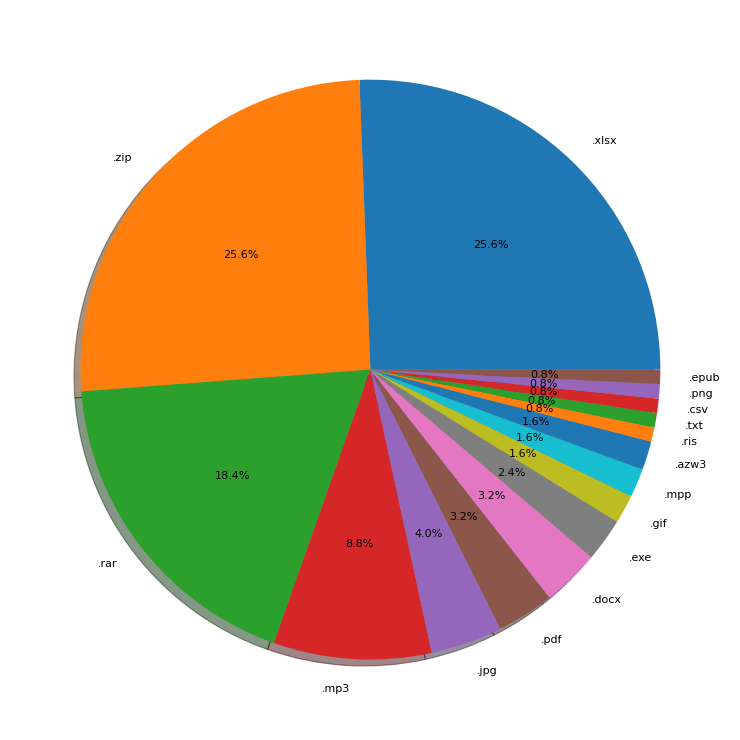

In [116]:
#Get the directory path
DIR_PATH = Path("/mnt/c/users/shayan/downloads")

#Get all files' types
file_extension = []
for file in DIR_PATH.iterdir():
    if file.is_dir():
        continue
    file_extension.append(file.suffix)

#files statistics
file_stat = Counter(file_extension).most_common()
label = []
number_of_file = []
for element in file_stat:
    label.append(element[0])
    number_of_file.append(element[1])
   
# plot a pie chart of directory contents
plt.figure(figsize=(12, 12), dpi=80)
plt.pie(x=number_of_file, labels=label, shadow=True, autopct='%1.1f%%')

In [117]:
file_dir = {
    ".png": "image",
    ".csv": "data",
    ".pdf": "document",
    ".xlsx": "excel",
    ".exe": "executable",
    ".zip": "compressed",
    ".jpg": "image",
    ".docx": "document",
    ".pptx": "presentation",
    ".txt": "document",
    ".rar": "compressed",
    ".json": "data",
    ".mpp": "project",
    ".py": "python",
    ".mp3": "audio",
    ".mp4": "video"
}

#creat correspondent directories for each file format and move those files into their specific directory
for file in DIR_PATH.iterdir():
    
    #exclude other directories and hidden files    
    if file.is_dir() or file.name.startswith("."):
        continue
    #process excluded file formats    
    if file.suffix not in file_dir:
        if Path(DIR_PATH / "other").is_dir():
            shutil.move(str(file), str(DIR_PATH / "other"))
            continue
        else:    
            Path(DIR_PATH / "other").mkdir()
            shutil.move(str(file), str(DIR_PATH / "other"))
            continue
    #process included file formats
    DEST_DIR = DIR_PATH / file_dir[file.suffix]
    if Path(DEST_DIR).is_dir():
        shutil.move(str(file), str(DEST_DIR))
    else:
        Path(DEST_DIR).mkdir()
        shutil.move(str(file), str(DEST_DIR))